In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import mne

import glob
import os
import sys
from scipy.io import savemat, loadmat
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.multitest import fdrcorrection
import scipy.stats as stats


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import*

In [167]:
sub = '01'
period = 'post'
ch_to_plot = 'FCz'
ch_idx = ch_index([ch_to_plot])[0]

time_to_plot = 0.1
time_idx = time_index([time_to_plot])[0]

ep_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05_30Hz'
mapchange_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv'

#read epochs data
ep_file = os.path.join(ep_path, f'error_epochs_all_{period}_{sub}.fif')
eps = mne.read_epochs(ep_file).get_data()

#read mapchange data
mapchange_file = os.path.join(mapchange_path, f'mapchange_keystrokes_{period}_{sub}.csv')
mapchange_df = pd.read_csv(mapchange_file)


In [168]:
mapchange_df_firsts = mapchange_df.query('type =="first"')
mapchange_df_others = mapchange_df.query('type =="other"')

Text(0.5, 1.0, 'Amplitude at 0.1 s of first and other keystrokes, FCz sub 01 post')

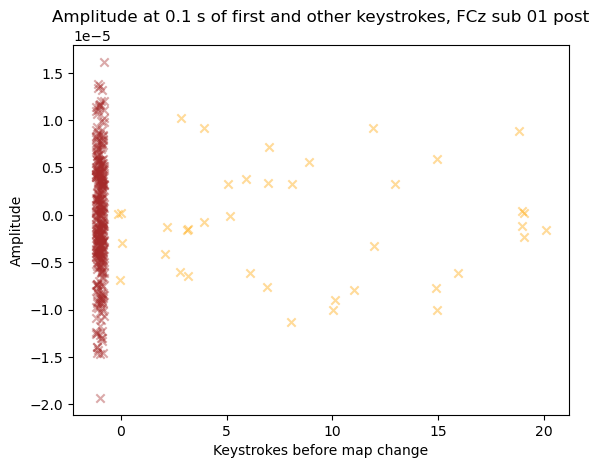

In [169]:
for i, row in mapchange_df_firsts.iterrows():
    keystroke_idx = row['keystroke_idx']
    jitter_x = row['prev_keystrokes'] + np.random.uniform(-0.2, 0.2)
    #plt.scatter(jitter_x, np.min(eps[keystroke_idx, ch_idx]), color = 'orange', marker = 'x', alpha = 0.4)
    plt.scatter(jitter_x, eps[keystroke_idx, ch_idx, time_idx], color = 'orange', marker = 'x', alpha = 0.4)



for i, row in mapchange_df_others.iterrows():
    keystroke_idx = row['keystroke_idx']
    jitter_x = -1 + np.random.uniform(-0.2, 0.2)
    #plt.scatter(jitter_x, np.min(eps[keystroke_idx, ch_idx]), color = 'brown', marker = 'x', alpha = 0.4)
    plt.scatter(jitter_x, eps[keystroke_idx, ch_idx, time_idx], color = 'brown', marker = 'x', alpha = 0.4)

#plt.hlines(0,0,max(mapchange_df_firsts['prev_keystrokes']), color = 'black')
plt.ylabel('Amplitude')
plt.xlabel('Keystrokes before map change')
plt.title(f'Amplitude at {time_to_plot} s of first and other keystrokes, {ch_to_plot} sub {sub} {period}')

## Loop over subs 

In [146]:
mne.set_log_level('CRITICAL')

ValueError: x and y must be the same size

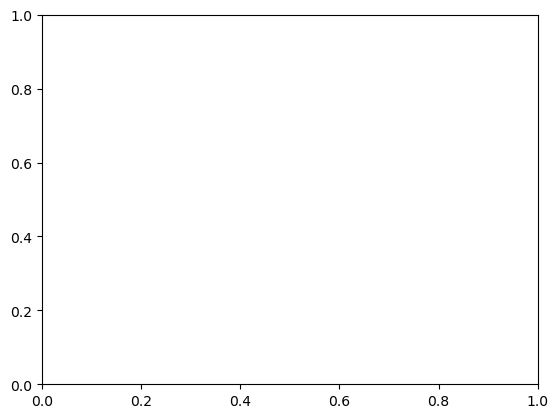

In [209]:
good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()
subjects_to_process = good_error_subjects

plt.figure()

#for k, sub in enumerate([s for s in subjects_to_process if s != '04']):
for k, sub in enumerate(subjects_to_process):
    if sub == '01':
        col = 'orange'
    else: 
        col = 'green'
    #read epochs data
    ep_file = os.path.join(ep_path, f'error_epochs_all_{period}_{sub}.fif')
    eps = mne.read_epochs(ep_file).get_data()
    
    #read mapchange data
    mapchange_file = os.path.join(mapchange_path, f'mapchange_keystrokes_{period}_{sub}.csv')
    mapchange_df = pd.read_csv(mapchange_file)
    mapchange_df_firsts = mapchange_df.query('type =="first"')
    mapchange_df_others = mapchange_df.query('type =="other"')


    for i, row in mapchange_df_firsts.iterrows():
        try:
            keystroke_idx = row['keystroke_idx']
            jitter_x = row['prev_keystrokes'] + np.random.uniform(-0.2, 0.2)
            #plt.scatter(jitter_x, np.min(eps[keystroke_idx, ch_idx]), color = 'orange', marker = 'x', alpha = 0.4)
            plt.scatter(jitter_x, eps[keystroke_idx, ch_idx, time_idx], color = col, marker = 'x', alpha = 0.4)

        except IndexError: 
            print(f'failed to plot {sub}')
            continue



    for i, row in mapchange_df_others.iterrows():
        try:
            keystroke_idx = row['keystroke_idx']
        except IndexError:
            print(f'failed to plot {sub}')
            continue 
        jitter_x = -1 + np.random.uniform(-0.2, 0.2)
        #plt.scatter(jitter_x, np.min(eps[keystroke_idx, ch_idx]), color = 'brown', marker = 'x', alpha = 0.4)
        plt.scatter(jitter_x, eps[keystroke_idx, ch_idx, time_idx], color = 'brown', marker = 'x', alpha = 0.4)
  

#plt.hlines(0,0,max(mapchange_df_firsts['prev_keystrokes']), color = 'black')
plt.ylabel('Amplitude')
plt.xlabel('Keystrokes before map change')
plt.title(f'Amplitude at {time_to_plot} s of first and other keystrokes, {ch_to_plot} {period}')
plt.tight_layout()
plt.ylim(-0.0006, 0.0004)
plt.hlines(0,0, 35, color = 'black')


/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/cindyzhang/anaconda3/envs/eelbrain-cnsp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

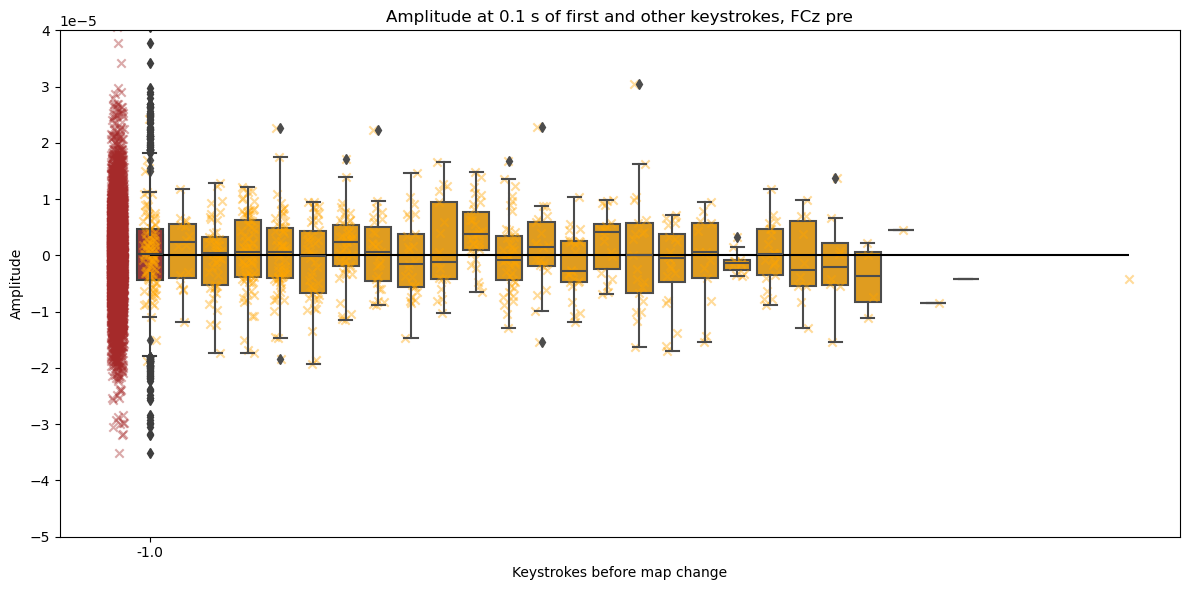

In [208]:
ch_idx = ch_index(['Cz', 'FCz', 'Fz', 'C1', 'FC1', 'F1', 'F2', 'FC2', 'C2'])
period = 'pre'

# Initialize figure
plt.figure(figsize = (12,6))

# Store the data for violin plot
firsts_y = []
firsts_x = []
others_y = []
others_x = []
# Loop over subjects

col = 'orange'
for k, sub in enumerate(subjects_to_process):
    # if sub == '01':
    #     col = 'green'
    # else: 
    #     col = 'orange'

    # Read epochs data
    ep_file = os.path.join(ep_path, f'error_epochs_all_{period}_{sub}.fif')
    eps = mne.read_epochs(ep_file).get_data()

    # Read mapchange data
    mapchange_file = os.path.join(mapchange_path, f'mapchange_keystrokes_{period}_{sub}.csv')
    mapchange_df = pd.read_csv(mapchange_file)
    mapchange_df_firsts = mapchange_df.query('type =="first"')
    mapchange_df_others = mapchange_df.query('type =="other"')

    # Collect the data for violin plot (you can collect `eps` or specific values)
    for i, row in mapchange_df_firsts.iterrows():
        try:
            keystroke_idx = row['keystroke_idx']
            jitter_x = row['prev_keystrokes'] + np.random.uniform(-0.2, 0.2)
            amp = np.mean(eps[keystroke_idx, ch_idx, time_idx])
            plt.scatter(jitter_x, amp, color='orange', marker='x', alpha=0.4)

            firsts_y.append(amp) 
            firsts_x.append(row['prev_keystrokes'])

        except IndexError: 
            print(f'failed to plot {sub}')
            continue

    for i, row in mapchange_df_others.iterrows():
        try:
            keystroke_idx = row['keystroke_idx']
            jitter_x = -1 + np.random.uniform(-0.2, 0.2)

            amp = np.mean(eps[keystroke_idx, ch_idx, time_idx])
            plt.scatter(jitter_x, amp, color='brown', marker='x', alpha=0.4)

            others_x.append(-1.0)
            others_y.append(amp) 
            
        except IndexError:
            print(f'failed to plot {sub}')
            continue 


# Create the violin plot, aligning it with the scatter plot
sns.boxplot(x=firsts_x, y=firsts_y, color='orange')
sns.boxplot(x=others_x, y=others_y, color='brown')


# Customize plot
plt.ylabel('Amplitude')
plt.xlabel('Keystrokes before map change')
plt.title(f'Amplitude at {time_to_plot} s of first and other keystrokes, {ch_to_plot} {period}')
plt.tight_layout()
plt.ylim(-0.00005, 0.00004)
plt.hlines(0, 0, 30, color='black')


In [150]:
data17 = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed_30Hz/17/eeg_error_post_17.mat')

01
(285, 5) (285, 72, 129)
05
(303, 5) (303, 72, 129)
06
(369, 5) (369, 72, 129)
07
(373, 5) (373, 72, 129)
08
(267, 5) (267, 72, 129)
09
(394, 5) (394, 72, 129)
10
(283, 5) (283, 72, 129)
11
(402, 5) (402, 72, 129)
12
(281, 5) (281, 72, 129)
13
(398, 5) (398, 72, 129)
14
(310, 5) (310, 72, 129)
15
(445, 5) (445, 72, 129)
16
(289, 5) (289, 72, 129)
17
(395, 5) (395, 72, 129)
18
(294, 5) (294, 72, 129)
19
(395, 5) (395, 72, 129)
20
(356, 5) (356, 72, 129)


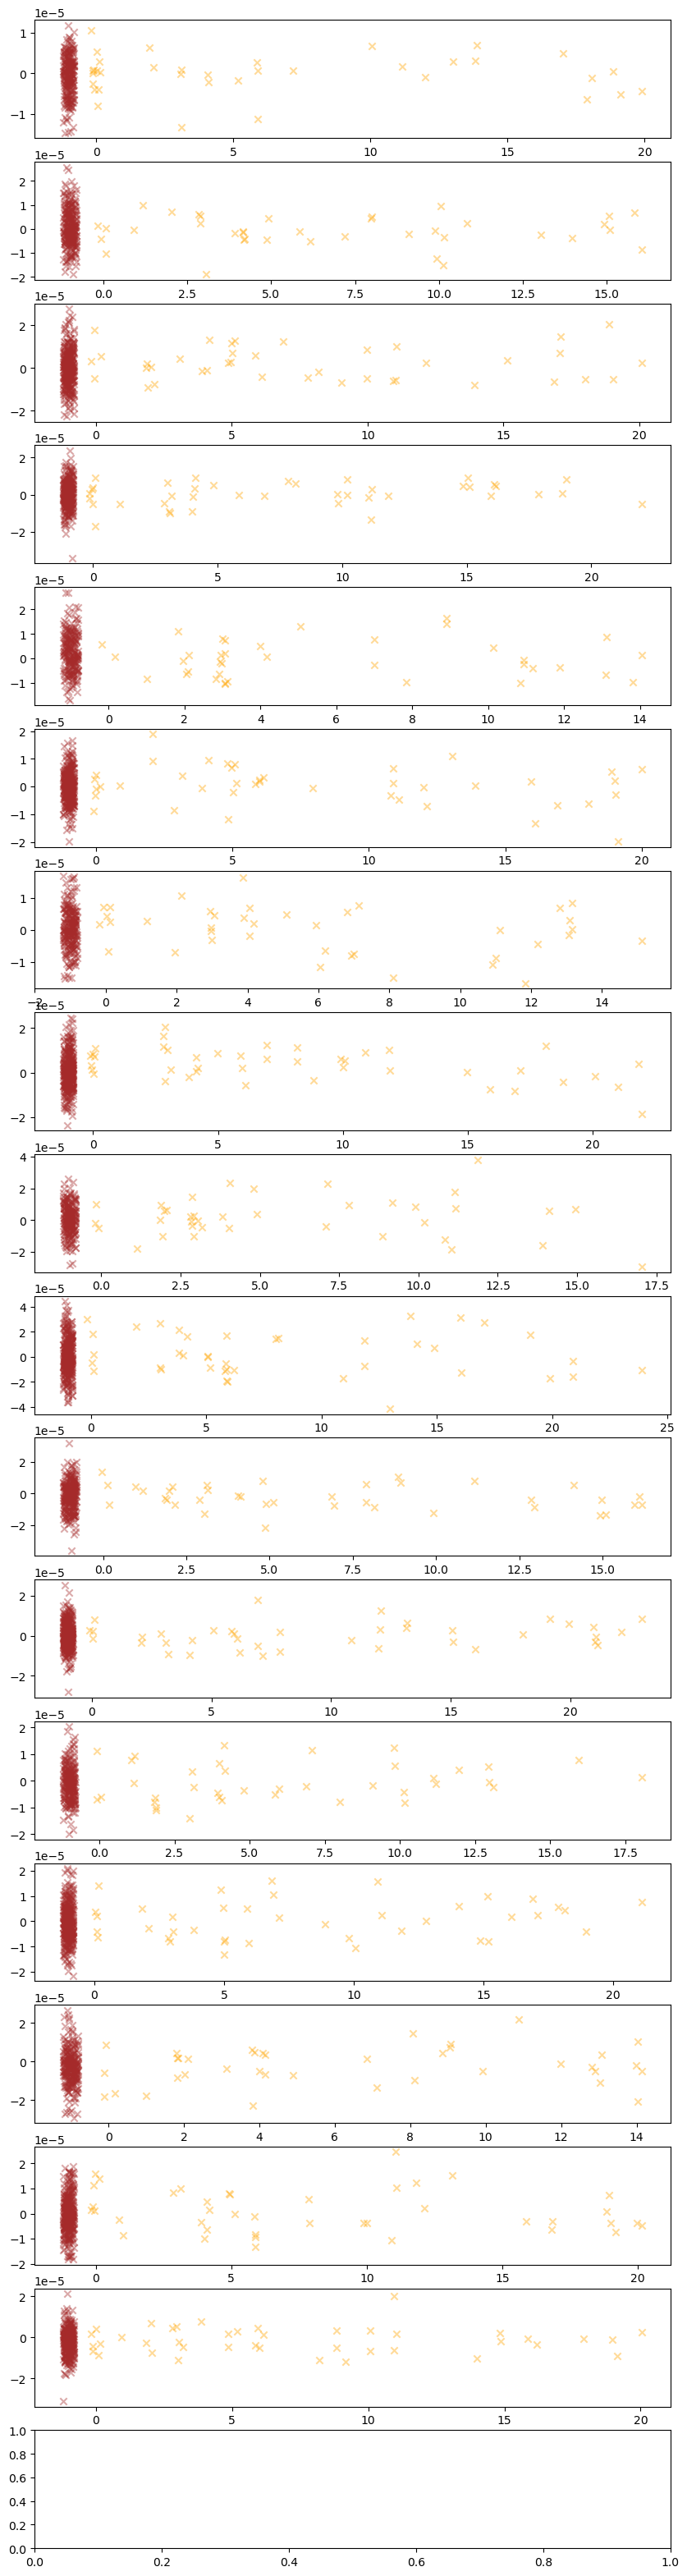

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

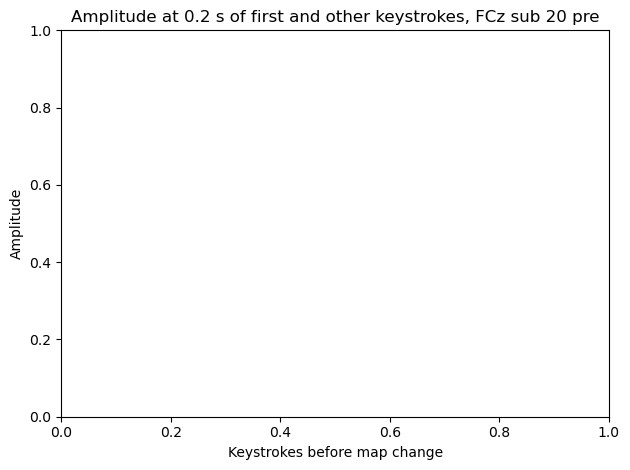

In [157]:
"""good_listen_subjects, good_motor_subjects,good_error_subjects,musicians,nonmusicians = load_subject_lists_LME()
subjects_to_process = good_error_subjects

#17 post has a shorter length

period = 'pre'
ch_to_plot = 'FCz'
ch_idx = ch_index([ch_to_plot])[0]

time_to_plot = 0.2
time_idx = time_index([time_to_plot])[0]

ep_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05_30Hz'
mapchange_path = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/mapchange_csv'

fig, axes = plt.subplots(18, 1, figsize = (10,40))
#for k, sub in enumerate([s for s in subjects_to_process if s != '04']):
for k, sub in enumerate([s for s in subjects_to_process if s != '04']):

    print(sub)
    #read epochs data
    ep_file = os.path.join(ep_path, f'error_epochs_all_{period}_{sub}.fif')
    eps = mne.read_epochs(ep_file).get_data()

    #read mapchange data
    mapchange_file = os.path.join(mapchange_path, f'mapchange_keystrokes_{period}_{sub}.csv')
    mapchange_df = pd.read_csv(mapchange_file)
    mapchange_df_firsts = mapchange_df.query('type =="first"')
    mapchange_df_others = mapchange_df.query('type =="other"')

    print(mapchange_df.shape, eps.shape)

    plt.figure()
    for i, row in mapchange_df_firsts.iterrows():
        keystroke_idx = row['keystroke_idx']
        jitter_x = row['prev_keystrokes'] + np.random.uniform(-0.2, 0.2)
        #plt.scatter(jitter_x, np.min(eps[keystroke_idx, ch_idx]), color = 'orange', marker = 'x', alpha = 0.4)
        axes[k].scatter(jitter_x, eps[keystroke_idx, ch_idx, time_idx], color = 'orange', marker = 'x', alpha = 0.4)



    for i, row in mapchange_df_others.iterrows():
        keystroke_idx = row['keystroke_idx']
        jitter_x = -1 + np.random.uniform(-0.2, 0.2)
        #plt.scatter(jitter_x, np.min(eps[keystroke_idx, ch_idx]), color = 'brown', marker = 'x', alpha = 0.4)
        axes[k].scatter(jitter_x, eps[keystroke_idx, ch_idx, time_idx], color = 'brown', marker = 'x', alpha = 0.4)
  

#plt.hlines(0,0,max(mapchange_df_firsts['prev_keystrokes']), color = 'black')
plt.ylabel('Amplitude')
plt.xlabel('Keystrokes before map change')
plt.title(f'Amplitude at {time_to_plot} s of first and other keystrokes, {ch_to_plot} sub {sub} {period}')
plt.tight_layout()"""